# Predicting the Sale Price of Bulldozers using Machine Learning

This example of machine learning uses Supervised Learning (Regression) to forecast the sale price of bulldozers.

## 1. Problem defintion
Given the characteristic of a bulldozer, would it be possible to predict the price of sale?

## 2. Data
The data is downloadedd from Kaggle bulldozer competition. 

## 3. Evaluation
The evaluation for this is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
**Goal is minimizing the RMSLE !!**

## 4. Features

Data dictionary is provided by Kaggle in the dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [5]:
#Training and validation set
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory = False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

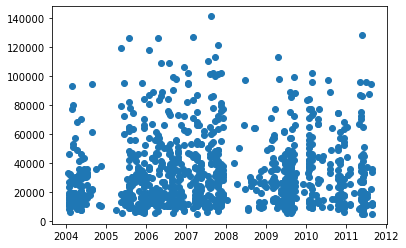

In [14]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

<AxesSubplot:ylabel='Frequency'>

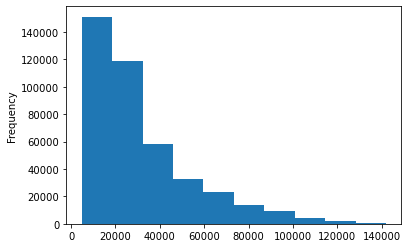

In [9]:
df.SalePrice.plot.hist() #Most of the bulldozer are below 20000 dollars

### Parsing date

Try to enrich the time & date component as much as possible - using datetime objects in pandas

In [11]:
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",
             low_memory = False,
             parse_dates = ["saledate"])

In [12]:
df.saledate.dtype

dtype('<M8[ns]')

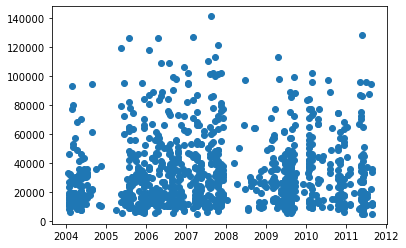

In [15]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [17]:
#Sorting DataFrame by saledate
df.sort_values(by = ["saledate"],
              inplace = True, ascending = True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [18]:
## We should copy our original dataframe to another dataframe to secure our current status
df_tmp = df.copy()

## Feature Engineering 
Creating a new feature or changing an existing one trying to enrich our dataset

In [22]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

In [23]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [24]:
# Now we've enriched our DataFrame so we will remove saledate
df_tmp.drop("saledate", axis = 1, inplace = True)

## 5. Modelling
 
Why not start right now to do some model-driven EDA and see if we can get to know better about the data with this approach

**RandomForestRegressor**

In [ ]:
form sklearn.ensemble import RandomForestRegressor

alg = RandomForestRegressor(n_jobs = 1,
                           random_state = 42)
model.fit(df_tmp.drop("SalePrice", axis = 1), df_tmp = )